In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
import matplotlib as mpl
import matplotlib.pylab
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 14
matplotlib.rc('font',family='NanumGothic')
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages
# ! python -m pip install statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages
# ! python -m pip install statsmodels

In [3]:
df = pd.read_excel('./time/unit_time_data.xls')
df = df.replace(['농업, 임업 및 어업','광업', '제조업', '전기, 가스, 증기 및 수도사업', '하수폐기처리원료재생환경복원', '건설업', '도매 및 소매업', '운수업'], ['primary', 'mining', 'manufacture', 'energy', 'recycle', 'building', 'retail', 'transportation'])
df

,industry,place,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,primary,강원도,464.603568,321.822818,447.003493,451.104407,429.786252,381.083667,397.869054,437.050625,...,545.424725,575.405768,612.267187,427.739822,498.287100,453.647254,480.894819,488.058859,681.403158,658.409402
1,mining,강원도,8794.302452,8524.970027,7108.361413,7961.915989,7356.505405,8215.906417,8170.518519,8271.489529,...,126146.690840,118439.644788,111098.348659,128608.792969,126971.602317,126801.980545,123785.674419,130903.972332,125354.602362,122025.346614
2,manufacture,강원도,166000.890632,143351.567459,180589.213645,186325.304698,189800.754558,178147.676862,177129.824152,175428.902870,...,74383.952646,66720.229573,61990.705616,69712.039636,70043.545558,71180.942686,70960.924925,70574.068848,67165.890533,64606.686131
3,energy,강원도,469349.861111,391298.166667,473932.888889,441464.361111,458378.277778,441228.611111,421594.250000,396680.000000,...,9180.907286,8348.109281,9041.798885,8162.649191,7666.069625,6088.530199,7022.175703,7516.792891,6786.157387,7992.783095
4,recycle,강원도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6923.385619,7135.661217,7038.413123,6569.078860,6538.936556,6499.154079,6326.912624,6425.835789,6656.464221,6420.298771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,energy,충청북도,298708.250000,268815.357143,291063.321429,268002.750000,271191.607143,270982.000000,277799.703704,277944.642857,...,5676.394824,5959.757212,5835.194541,5567.481146,5504.935235,5608.722530,5690.310717,6022.630653,6386.468782,5703.430163
132,recycle,충청북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14137.520969,14739.596812,14088.059552,12920.274706,13017.593180,13079.437024,13007.136257,12917.688153,13144.520325,12628.328696
133,building,충청북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4659.138117,5296.276613,5301.346378,4066.228435,3480.745265,2960.722026,2927.827928,2769.301410,3088.554936,2680.323387
134,retail,충청북도,3705.586319,3353.160000,2621.779461,2518.877647,2049.731951,1983.016554,1978.646972,2009.774431,...,2399.977730,2639.750894,2681.698501,2178.715977,2136.906456,2096.238007,2342.387787,2589.107824,3109.559264,2628.407217


In [4]:
# def(industry, place)

c = 'primary'
p = '강원도'

In [5]:
df = df[(df.industry == c) & (df.place == p)]
df = df.transpose()
df.columns =[c+p]
df = df[2:]
df

,primary강원도
2007-02,464.604
2007-03,321.823
2007-04,447.003
2007-05,451.104
2007-06,429.786
...,...
2018-06,453.647
2018-07,480.895
2018-08,488.059
2018-09,681.403


In [6]:
sum(df['primary강원도'][129:141].tolist())

6518.718207946061

In [7]:
df.raw[129:141]

AttributeError: 'DataFrame' object has no attribute 'raw'

In [ ]:
sum(df['primary강원도'][119:131].tolist())

In [ ]:
plt.plot(df)
plt.xlabel('Time(Monthly)')
plt.ylabel('Carbon Emissions')
plt.title(c+p)
plt.show()

In [8]:
adfuller(df)

(-2.6502563164051076,
 0.08304865532750777,
 14,
 126,
 {'1%': -3.4833462346078936,
  '5%': -2.8847655969877666,
  '10%': -2.5791564575459813},
 1218.327468473948)

In [9]:
def TestStationaryAdfuller(ts, cutoff = 0.05):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [10]:
TestStationaryAdfuller(df)

Test Statistic                  -2.650256
p-value                          0.083049
#Lags Used                      14.000000
Number of Observations Used    126.000000
Critical Value (1%)             -3.483346
Critical Value (5%)             -2.884766
Critical Value (10%)            -2.579156
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [11]:
df.values

array([[464.6035678014748],
       [321.8228177182282],
       [447.00349312359947],
       [451.10440683864795],
       [429.786252151463],
       [381.08366677252036],
       [397.8690536118802],
       [437.050625459897],
       [457.4328308277751],
       [451.79959640509276],
       [440.0416355437519],
       [461.6253519364325],
       [503.0858671347669],
       [542.5691866669457],
       [339.82966201679506],
       [433.41061862706573],
       [475.1122980453032],
       [457.81223291665003],
       [454.55195590538693],
       [493.8499547760431],
       [479.00309254288715],
       [508.192358977332],
       [514.5657375773325],
       [511.99624598475174],
       [569.6506949169016],
       [564.8765120478419],
       [345.5097250522639],
       [492.0918291355573],
       [444.8274382290111],
       [440.0114685731308],
       [425.16061763179357],
       [490.2637703503845],
       [516.6934773546949],
       [529.329250004517],
       [546.0197377624601],
       [543.3

In [12]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
# print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
# print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
# print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

In [13]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
best_model =None

for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        mod = sm.tsa.statespace.SARIMAX(df.values.astype(float),
                                        order=param,
                                        seasonal_order=seasonal_param,
                                        enforce_stationarity=True,
                                        enforce_invertibility=True)
        results = mod.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = seasonal_param
            best_model = mod
print('Best ARIMA{}x{} - AIC:{}'.format(best_pdq, best_seasonal_pdq, best_aic))
            

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:2158.5017785376726
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2008.9109154031491
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1350.2149583629064
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1342.717343677027
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1534.8285699741427
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1527.5132334716263
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1341.489334075362
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1342.9736800387145
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:2004.0472347482757
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1858.8183554695584
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1327.4418284158849
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1324.023743901143
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1503.5683829691625
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1501.0283792195683
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1323.5502476086972
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1325.0929508035865
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1619.1682817994297
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1538.703923020023
ARIMA(0, 1, 0)x(0, 1, 0, 12) - A

In [14]:
best_pdq

(0, 1, 1)

In [15]:
best_seasonal_pdq

(1, 1, 0, 12)

In [16]:
df.values.astype(float)

array([[464.6035678 ],
       [321.82281772],
       [447.00349312],
       [451.10440684],
       [429.78625215],
       [381.08366677],
       [397.86905361],
       [437.05062546],
       [457.43283083],
       [451.79959641],
       [440.04163554],
       [461.62535194],
       [503.08586713],
       [542.56918667],
       [339.82966202],
       [433.41061863],
       [475.11229805],
       [457.81223292],
       [454.55195591],
       [493.84995478],
       [479.00309254],
       [508.19235898],
       [514.56573758],
       [511.99624598],
       [569.65069492],
       [564.87651205],
       [345.50972505],
       [492.09182914],
       [444.82743823],
       [440.01146857],
       [425.16061763],
       [490.26377035],
       [516.69347735],
       [529.32925   ],
       [546.01973776],
       [543.37652896],
       [614.19067789],
       [618.66391839],
       [379.6044624 ],
       [538.14541241],
       [457.98599767],
       [460.25903444],
       [440.06212867],
       [502

In [17]:
df

,primary강원도
2007-02,464.604
2007-03,321.823
2007-04,447.003
2007-05,451.104
2007-06,429.786
...,...
2018-06,453.647
2018-07,480.895
2018-08,488.059
2018-09,681.403


In [18]:
best_model

In [19]:
df['primary강원도'] = pd.to_numeric(df['primary강원도'])
df

,primary강원도
2007-02,464.603568
2007-03,321.822818
2007-04,447.003493
2007-05,451.104407
2007-06,429.786252
...,...
2018-06,453.647254
2018-07,480.894819
2018-08,488.058859
2018-09,681.403158


In [20]:
df.dtypes

primary강원도    float64
dtype: object

In [21]:
# df.to_numeric() 

AttributeError: 'DataFrame' object has no attribute 'to_numeric'

In [22]:
df.values.astype(float)

array([[464.6035678 ],
       [321.82281772],
       [447.00349312],
       [451.10440684],
       [429.78625215],
       [381.08366677],
       [397.86905361],
       [437.05062546],
       [457.43283083],
       [451.79959641],
       [440.04163554],
       [461.62535194],
       [503.08586713],
       [542.56918667],
       [339.82966202],
       [433.41061863],
       [475.11229805],
       [457.81223292],
       [454.55195591],
       [493.84995478],
       [479.00309254],
       [508.19235898],
       [514.56573758],
       [511.99624598],
       [569.65069492],
       [564.87651205],
       [345.50972505],
       [492.09182914],
       [444.82743823],
       [440.01146857],
       [425.16061763],
       [490.26377035],
       [516.69347735],
       [529.32925   ],
       [546.01973776],
       [543.37652896],
       [614.19067789],
       [618.66391839],
       [379.6044624 ],
       [538.14541241],
       [457.98599767],
       [460.25903444],
       [440.06212867],
       [502

In [23]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
# best_model =None

for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        mod = sm.tsa.statespace.SARIMAX(df['primary강원도'],
                                        order=param,
                                        seasonal_order=seasonal_param,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = seasonal_param
#             best_model = results
print('Best ARIMA{}x{} - AIC:{}'.format(best_pdq, best_seasonal_pdq, best_aic))

Best ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1087.176547667621


In [24]:
best_model

In [25]:
best_seasonal_pdq

(0, 1, 1, 12)

In [26]:
mod = sm.tsa.statespace.SARIMAX(df, 
                                order=best_pdq, 
                                seasonal_order=best_seasonal_pdq,   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()


In [27]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = best_model.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = best_model.conf_int()
forecast_ci.head()

AttributeError: 'SARIMAX' object has no attribute 'get_forecast'

In [28]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps=48)
# forecast = results.get_forecast(steps=pd.date_range('20200802', '20230802', freq='M'))
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci

,lower primary강원도,upper primary강원도
2018-11-01,529.023628,637.726990
2018-12-01,561.075274,685.898841
2019-01-01,521.916693,661.004525
2019-02-01,543.735627,695.755123
2019-03-01,568.886057,732.820279
2019-04-01,386.426960,561.466759
2019-05-01,458.062109,643.543734
2019-06-01,409.515969,604.882126
2019-07-01,432.991824,637.765937
2019-08-01,430.068893,643.837318


In [29]:
forecast_ci['mean'] = forecast_ci.mean(axis=1)

In [30]:
dff = df.join(forecast_ci, how='outer')
dff

,primary강원도,lower primary강원도,upper primary강원도,mean
2007-02-01,464.603568,NaN,NaN,NaN
2007-03-01,321.822818,NaN,NaN,NaN
2007-04-01,447.003493,NaN,NaN,NaN
2007-05-01,451.104407,NaN,NaN,NaN
2007-06-01,429.786252,NaN,NaN,NaN
...,...,...,...,...
2022-06-01,NaN,178.510246,1041.770484,610.140365
2022-07-01,NaN,196.673361,1079.967035,638.320198
2022-08-01,NaN,188.453068,1091.335779,639.894423
2022-09-01,NaN,337.647525,1259.703199,798.675362


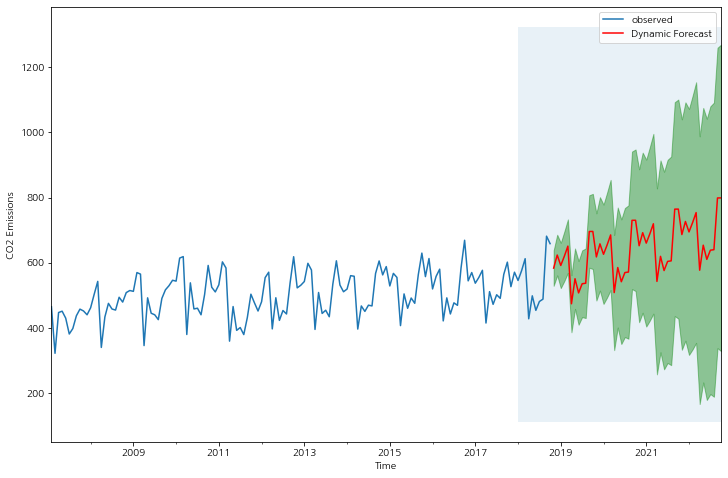

In [31]:
ax = dff['primary강원도'].plot(label='observed',figsize=(12, 8)) 
dff['mean'].plot(label='Dynamic Forecast', color='r', ax=ax)

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2018-01-01'), 
                 dff.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [33]:
dff['primary강원도']

2007-02-01    464.603568
2007-03-01    321.822818
2007-04-01    447.003493
2007-05-01    451.104407
2007-06-01    429.786252
                 ...    
2022-06-01           NaN
2022-07-01           NaN
2022-08-01           NaN
2022-09-01           NaN
2022-10-01           NaN
Name: primary강원도, Length: 189, dtype: float64

In [35]:
dff = dff.replace(np.nan, 'null')

In [39]:
list(filter(lambda a: a != 'null', dff['primary강원도'][129:141].tolist()))

[526.366853123146,
 570.8132608398304,
 545.424725443149,
 575.4057679906122,
 612.2671874339352,
 427.7398216329808,
 498.2871000146496,
 453.64725419577155,
 480.89481867419016,
 488.0588589877194,
 681.4031579694135,
 658.4094016406627]

In [41]:
list(filter(lambda a: a != 'null', dff['primary강원도'].tolist()))[-12:]

[526.366853123146,
 570.8132608398304,
 545.424725443149,
 575.4057679906122,
 612.2671874339352,
 427.7398216329808,
 498.2871000146496,
 453.64725419577155,
 480.89481867419016,
 488.0588589877194,
 681.4031579694135,
 658.4094016406627]

In [42]:
sum(map(float, list(filter(lambda a: a != 'null', dff['primary강원도'].tolist()))[-12:]))

6518.718207946061

In [ ]:
2009-10-01 00:00:00

In [61]:
sum(map(float, dff.loc['2017-01-01':'2017-12-01']['primary강원도'].tolist()))

6321.6323279277

In [ ]:
[129:141]

In [ ]:
df.loc['2017-01-01':'2017-12-01'].raw.tolist()

In [ ]:
qwe = list(filter(lambda a: a != null, df.raw[129:141].tolist()))

In [ ]:
sum(map(float, df.loc['2017-01-01':'2017-12-01'].raw.tolist()))

In [62]:
in_pl = 'energy경상남도'

In [63]:
import sqlite3

In [65]:
db_test = sqlite3.connect('./timeseries.db')
c = db_test.cursor()
df = pd.read_sql("SELECT * FROM " + in_pl + "", db_test, index_col=None)
df = df.replace(np.nan, 'null')
df

,id,raw,lower,upper,mean,date,target
0,1,282064.378323108,null,null,null,2007-02-01 00:00:00,282064.378323108
1,2,211530.256972112,null,null,null,2007-03-01 00:00:00,211530.256972112
2,3,252147.962450593,null,null,null,2007-04-01 00:00:00,252147.962450593
3,4,232757.88996139,null,null,null,2007-05-01 00:00:00,232757.88996139
4,5,239238.952741021,null,null,null,2007-06-01 00:00:00,239238.952741021
...,...,...,...,...,...,...,...
184,185,null,-160360.161088983,174414.857627481,7027.34826924905,2022-06-01 00:00:00,7027.34826924905
185,186,null,-162825.073810396,177289.026902293,7231.97654594842,2022-07-01 00:00:00,7231.97654594842
186,187,null,-165200.554533657,180145.571555694,7472.50851101885,2022-08-01 00:00:00,7472.50851101885
187,188,null,-167955.087764232,182531.187859828,7288.05004779808,2022-09-01 00:00:00,7288.05004779808


In [66]:
sum(map(float, list(filter(lambda a: a != 'null', df.raw.tolist()))[-12:]))

97000.31485810106

In [67]:
co2 = 12312331231

In [92]:
start = df.loc[df.date == '2017-01-01 00:00:00'].index

In [95]:
start[0]

119

In [97]:
df.loc[start[0]:start[0]+11]

,id,raw,lower,upper,mean,date,target
119,120,7763.9775,null,null,null,2017-01-01 00:00:00,7763.9775
120,121,7719.71761916646,null,null,null,2017-02-01 00:00:00,7719.71761916646
121,122,7473.66650074664,null,null,null,2017-03-01 00:00:00,7473.66650074664
122,123,7482.95388258756,null,null,null,2017-04-01 00:00:00,7482.95388258756
123,124,7679.38795903073,null,null,null,2017-05-01 00:00:00,7679.38795903073
124,125,8157.46420525657,null,null,null,2017-06-01 00:00:00,8157.46420525657
125,126,8641.66308288536,null,null,null,2017-07-01 00:00:00,8641.66308288536
126,127,9097.22771535581,null,null,null,2017-08-01 00:00:00,9097.22771535581
127,128,8387.82666167851,null,null,null,2017-09-01 00:00:00,8387.82666167851
128,129,8093.37749658851,null,null,null,2017-10-01 00:00:00,8093.37749658851


In [86]:
start+12

Int64Index([131], dtype='int64')

In [101]:
sum(map(float, df.loc[start[0]:start[0]+11].raw.tolist()))

96160.23479467643

In [102]:
start = df.loc[df.date == '2017-01-01 00:00:00'].index

In [103]:
stand = sum(map(float, df.loc[start[0]:start[0]+11].raw.tolist()))

In [107]:
stand

96160.23479467643

In [108]:
co2 = 65432

In [115]:
ratio = round((float(co2) / stand) * 100, 3)
ratio

68.045

In [118]:
if ratio >= 100:
    compare = '더 많이'
else:
    compare = '더 조금'

In [119]:
compare

'더 조금'

In [ ]:
DF [n1] .multiply (df [n2])

In [120]:
df.target

0      282064.378323108
1      211530.256972112
2      252147.962450593
3       232757.88996139
4      239238.952741021
             ...       
184    7027.34826924905
185    7231.97654594842
186    7472.50851101885
187    7288.05004779808
188    6628.46632611469
Name: target, Length: 189, dtype: object

In [128]:
value_target = df.target.tolist()
value_target

['282064.378323108',
 '211530.256972112',
 '252147.962450593',
 '232757.88996139',
 '239238.952741021',
 '245121.541589649',
 '262525.041742287',
 '264864.366726297',
 '236032.324561403',
 '245102.027633851',
 '246007.327150084',
 '257376.915562914',
 '273686.464401294',
 '231085.366508689',
 '239353.41314554',
 '231073.328267477',
 '7830.836353873',
 '7419.73018640204',
 '7652.15343275561',
 '7622.27450188476',
 '8019.83465733136',
 '8654.73466361063',
 '8559.54843918192',
 '10732.5372490907',
 '8599.08804187358',
 '8029.37852882704',
 '7952.08927173062',
 '8019.7404758809',
 '7587.55383211679',
 '7527.58280046979',
 '6879.15074393109',
 '7236.51375668275',
 '7485.45723940733',
 '7760.59397231923',
 '8584.83241015072',
 '8626.38602372357',
 '8922.90603337612',
 '7800.03894440174',
 '7499.24383386581',
 '7021.34554038535',
 '7211.28551372049',
 '7314.27019070779',
 '7393.25692052558',
 '7458.78842468379',
 '7312.00345533658',
 '7608.86798975672',
 '8047.72621334358',
 '8727.6905645884'

In [132]:
value_target = list(map(float, df.target.tolist()))
value_target

[282064.378323108,
 211530.256972112,
 252147.962450593,
 232757.88996139,
 239238.952741021,
 245121.541589649,
 262525.041742287,
 264864.366726297,
 236032.324561403,
 245102.027633851,
 246007.327150084,
 257376.915562914,
 273686.464401294,
 231085.366508689,
 239353.41314554,
 231073.328267477,
 7830.836353873,
 7419.73018640204,
 7652.15343275561,
 7622.27450188476,
 8019.83465733136,
 8654.73466361063,
 8559.54843918192,
 10732.5372490907,
 8599.08804187358,
 8029.37852882704,
 7952.08927173062,
 8019.7404758809,
 7587.55383211679,
 7527.58280046979,
 6879.15074393109,
 7236.51375668275,
 7485.45723940733,
 7760.59397231923,
 8584.83241015072,
 8626.38602372357,
 8922.90603337612,
 7800.03894440174,
 7499.24383386581,
 7021.34554038535,
 7211.28551372049,
 7314.27019070779,
 7393.25692052558,
 7458.78842468379,
 7312.00345533658,
 7608.86798975672,
 8047.72621334358,
 8727.6905645884,
 9126.9259971784,
 8265.91426743442,
 8338.5918106206,
 8279.41002307101,
 7377.10231065469,
 

In [134]:
[element * (ratio/100) for element in value_target]

[191930.70622995886,
 143935.76335667362,
 171574.08104950603,
 158380.1062242278,
 162790.14539262775,
 166792.95297467665,
 178635.1646535392,
 180226.9583389088,
 160608.19524780667,
 166779.6747034539,
 167395.68575927464,
 175132.1221947848,
 186229.95470186052,
 157242.03764083743,
 162868.0299748827,
 157233.84621960472,
 5328.492596992883,
 5048.755405337268,
 5206.907803318555,
 5186.5766848074845,
 5457.096492581124,
 5889.114201853853,
 5824.3447354413365,
 7302.954971143767,
 5851.249458092877,
 5463.59061994036,
 5410.9991449491,
 5457.032406813159,
 5162.951005063869,
 5122.143716579669,
 4680.91812370791,
 4924.085785734777,
 5093.479378554718,
 5280.696168464619,
 5841.549213487057,
 5869.824369842703,
 6071.5914104107815,
 5307.536499718164,
 5102.86046675399,
 4777.674572955211,
 4906.919227811107,
 4976.995151267116,
 5030.741671571631,
 5075.332583576085,
 4975.452751183776,
 5177.45422362996,
 5476.075301869639,
 5938.7570446741765,
 6210.4167947800415,
 5624.54136

In [133]:
ratio

68.045

In [73]:
df.date=='2017-01-01 00:00:00'

0      False
1      False
2      False
3      False
4      False
       ...  
184    False
185    False
186    False
187    False
188    False
Name: date, Length: 189, dtype: bool

In [ ]:
sum(map(float, dff.loc['2017-01-01':'2017-12-01']['primary강원도'].tolist()))

In [69]:
df.loc['2017-01-01']

KeyError: '2017-01-01'

In [68]:
(float(co2) / sum(map(float, df.loc['2017-01-01 00:00:00':'2017-12-01 00:00:00']['raw'].tolist())) * 0.244)

ZeroDivisionError: float division by zero

In [ ]:
* 0.244

In [ ]:
im

In [ ]:
pred = results.get_prediction(start = 136, end = 160, dynamic=False)

In [45]:
forecast_ci

array([[-8.37087529e-01, -5.39064502e-01],
       [-4.61303223e-01, -2.88075228e-01],
       [ 1.15238911e+03,  1.63947983e+03]])

In [50]:
type(best_model)

statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

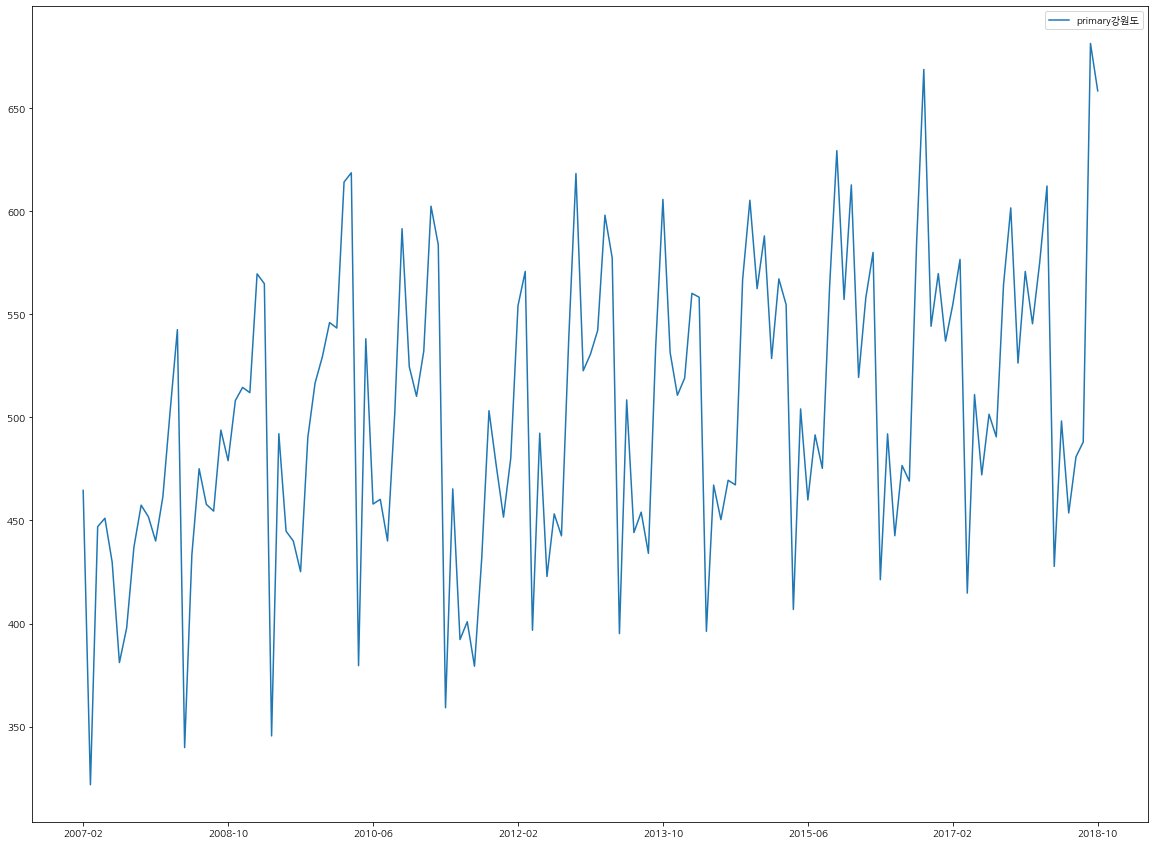

In [46]:
ax = df.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

In [29]:
d = range(1, 2)
p = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
#P,D,Q,S의 경우에는 위에서 각각 1,1,1,12로 결정

for param in pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['Travellers'],order=param,seasonal_order=(1,1,1,12))
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{} - BIC {}'.format(param,param_seasonal,results.aic,results.bic))
        except: 
            continue;

In [ ]:
dff = dff[pd.Series(pd.to_datetime(dff.index, errors='coerce')).notnull().values]